In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [2]:
seed = 10 # 1 or 10


x_m, y_m = make_classification(n_samples=60000, n_features=10, n_redundant=2, weights=[0.6], random_state=seed)
x_f, y_f = make_classification(n_samples=15000, n_features=10, n_redundant=2, weights=[0.4], random_state=seed)
m = np.array([[0] for _ in range(60000)])
f = np.array([[1] for _ in range(15000)])

In [3]:
m_join = np.append(x_m, m, axis=1)
m_join = np.append(m_join, np.expand_dims(y_m, axis=1), axis=1)

f_join = np.append(x_f, f, axis=1)
f_join = np.append(f_join, np.expand_dims(y_f, axis=1), axis=1)

join = np.append(m_join, f_join, axis=0)
np.random.seed = seed
np.random.shuffle(join)

headers = ''
for i in range(1, 11):
    headers += '"x' + str(i) + '",'
headers += '"a","y"'
np.savetxt("data.csv", join, delimiter=',', header=headers, comments='')
# print(np.unique(y_m, return_counts= True))

In [4]:
df = pd.read_csv("data.csv")

In [5]:
# df.drop(["ID"], axis=1, inplace=True)
# df.dropna(axis=0, inplace=True)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,a,y
0,-0.462305,-0.753377,-2.862915,0.072766,0.316647,-0.859147,-0.641625,-1.468212,-0.131054,-0.206220,1.0,1.0
1,0.026206,0.637597,-0.237986,-0.474397,0.385333,1.490973,-0.439806,-1.453481,-0.330104,1.685344,1.0,1.0
2,1.099890,0.319225,-1.496363,0.714446,0.942867,1.427435,0.321346,-2.269352,0.456099,-0.224891,1.0,0.0
3,0.374109,0.162152,0.894842,0.116264,2.469131,-1.321530,-0.337657,-0.503173,-0.983592,-0.115079,0.0,0.0
4,0.555262,-0.799676,0.396717,-0.762649,-0.143534,0.159080,-0.286214,0.559668,-1.452209,0.703671,0.0,1.0


In [6]:
# df["SEX"].value_counts()
#
# df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
# df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
# df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])
#
# df['MARRIAGE']=np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])
#
# def age(x):
#     if x in range(21,41):
#         return 1
#     elif x in range(41,61):
#         return 2
#     elif x in range(61,80):
#         return 3
#
# df['AGE']=df['AGE'].apply(age)

In [7]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [8]:
model = LogisticRegression(solver="lbfgs", random_state=seed)
# model = DecisionTreeClassifier()
model.fit(x_train, y_train)

comb = x_test.join(y_test)
comb.head()

sex_1 = comb.loc[comb['a'] == 0]
sex_2 = comb.loc[comb["a"] == 1]
#
x_1 = sex_1.iloc[:, :-1]
y_1 = sex_1.iloc[:, -1]

x_2 = sex_2.iloc[:, :-1]
y_2 = sex_2.iloc[:, -1]


# y_test_m = y_test.loc[y_test["SEX"] == 1]
# y_test_f = y_test.loc[y_test["SEX"] == 2]

p_1 = model.predict_proba(x_1)[: ,1] # only keep positive results
p_2 = model.predict_proba(x_2)[: ,1] # only keep positive results

In [9]:
fpr_1, tpr_1, tresholds_1 = roc_curve(y_1, p_1)
fpr_2, tpr_2, tresholds_2 = roc_curve(y_2, p_2)


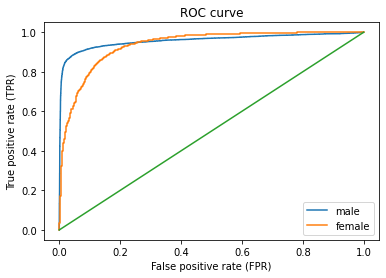

In [10]:
plt.plot(fpr_1, tpr_1, label="male")
plt.plot(fpr_2, tpr_2, label="female")
plt.plot([0,1], [0,1])
# plt.fill_between(fpr_1.sample(1000), (tpr_1.sample(1000)), fpr_2.sample(1000),tpr_2.sample(1000), alpha=0.3)
plt.legend()
plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("ROC curve")
plt.show()